#  LSTM+channel_attention

In [3]:
from LSTM_channel import BiLSTMWithAttention
from data_set import train_set
import torch
import torch.nn as nn
import numpy as np
from Task_block import contrastive_loss
from torch.utils.data import DataLoader
from Task_block import task_1
from tqdm import tqdm    # 进度条
from torch.optim.lr_scheduler import CosineAnnealingLR

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [5]:
train_data = train_set
train_loader = DataLoader(dataset=train_data, batch_size=1, shuffle=True)

In [6]:
train_model = BiLSTMWithAttention().to(device)

In [12]:
optimizer = torch.optim.Adam(train_model.parameters(), lr=1e-6)  # 优化器
# scheduler = CosineAnnealingLR(optimizer, T_max=10)  # 100epoch完成一个余弦周期
num_epochs = 20
train_losses = []
# 训练阶段
train_model.train()
for epoch in range(num_epochs):
    train_loss = 0.0
    # 创建进度条
    progress = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}')
    for x in progress:
        # 前向传播
        x1 = x.squeeze(0)  # 输入 (8, 22, 512)
        x1 = x1.to(device)
        x2 = task_1(x1).to(device)
        output_1 = train_model(x1)
        output_2 = train_model(x2)
        loss = contrastive_loss(output_1, output_2).to(device)
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        # 更新进度条显示
        progress.set_postfix(loss=loss.item())
    # scheduler.step()  # 更新学习率
    # 计算epoch平均损失
    epoch_train_loss = train_loss / len(train_loader)
    train_losses.append(epoch_train_loss)
    print(f'Epoch {epoch+1} - Train Loss: {epoch_train_loss:.4f}')

Epoch 1/20: 100%|██████████| 1800/1800 [00:15<00:00, 116.28it/s, loss=0.549]


Epoch 1 - Train Loss: 0.5456


Epoch 2/20: 100%|██████████| 1800/1800 [00:15<00:00, 118.75it/s, loss=0.545]


Epoch 2 - Train Loss: 0.5457


Epoch 3/20: 100%|██████████| 1800/1800 [00:15<00:00, 117.59it/s, loss=0.543]


Epoch 3 - Train Loss: 0.5456


Epoch 4/20: 100%|██████████| 1800/1800 [00:15<00:00, 115.46it/s, loss=0.547]


Epoch 4 - Train Loss: 0.5456


Epoch 5/20: 100%|██████████| 1800/1800 [00:14<00:00, 122.00it/s, loss=0.543]


Epoch 5 - Train Loss: 0.5456


Epoch 6/20: 100%|██████████| 1800/1800 [00:14<00:00, 121.70it/s, loss=0.544]


Epoch 6 - Train Loss: 0.5455


Epoch 7/20: 100%|██████████| 1800/1800 [00:14<00:00, 127.28it/s, loss=0.546]


Epoch 7 - Train Loss: 0.5456


Epoch 8/20: 100%|██████████| 1800/1800 [00:14<00:00, 125.35it/s, loss=0.545]


Epoch 8 - Train Loss: 0.5455


Epoch 9/20: 100%|██████████| 1800/1800 [00:14<00:00, 120.40it/s, loss=0.547]


Epoch 9 - Train Loss: 0.5455


Epoch 10/20: 100%|██████████| 1800/1800 [00:15<00:00, 118.65it/s, loss=0.549]


Epoch 10 - Train Loss: 0.5456


Epoch 11/20: 100%|██████████| 1800/1800 [00:14<00:00, 121.28it/s, loss=0.546]


Epoch 11 - Train Loss: 0.5456


Epoch 12/20: 100%|██████████| 1800/1800 [00:14<00:00, 123.37it/s, loss=0.543]


Epoch 12 - Train Loss: 0.5455


Epoch 13/20: 100%|██████████| 1800/1800 [00:14<00:00, 121.91it/s, loss=0.548]


Epoch 13 - Train Loss: 0.5455


Epoch 14/20: 100%|██████████| 1800/1800 [00:14<00:00, 122.10it/s, loss=0.543]


Epoch 14 - Train Loss: 0.5455


Epoch 15/20: 100%|██████████| 1800/1800 [00:15<00:00, 119.58it/s, loss=0.544]


Epoch 15 - Train Loss: 0.5455


Epoch 16/20: 100%|██████████| 1800/1800 [00:15<00:00, 116.44it/s, loss=0.545]


Epoch 16 - Train Loss: 0.5454


Epoch 17/20: 100%|██████████| 1800/1800 [00:15<00:00, 118.37it/s, loss=0.548]


Epoch 17 - Train Loss: 0.5455


Epoch 18/20: 100%|██████████| 1800/1800 [00:15<00:00, 115.01it/s, loss=0.545]


Epoch 18 - Train Loss: 0.5455


Epoch 19/20: 100%|██████████| 1800/1800 [00:15<00:00, 118.48it/s, loss=0.547]


Epoch 19 - Train Loss: 0.5454


Epoch 20/20: 100%|██████████| 1800/1800 [00:14<00:00, 122.52it/s, loss=0.546]

Epoch 20 - Train Loss: 0.5455


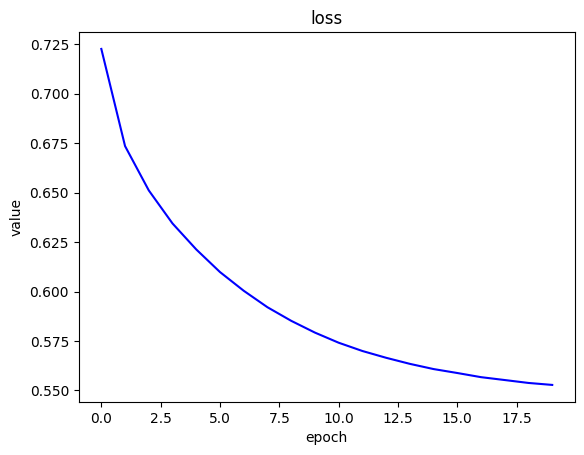

In [9]:
import matplotlib.pyplot as plt
# 绘制曲线
plt.plot(train_losses, label='训练损失', color='blue')
# 添加标题和图例
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('value')
# 显示图形
plt.show()

In [10]:
total_params = sum(p.numel() for p in train_model.parameters())
print(f"总参数量: {total_params:,}")  

总参数量: 1,077,584


In [ ]:
# torch.save(train_model.state_dict(), 'train_2_weights.pth')

### lr = [1e-4,1e-5,1e-6]
### loss = 0.5454
### 参数量：34W

#### 参数量：107w
#### loss = 0.5456
